In [109]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.sparse import hstack, coo_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [100]:
df_by_post = pd.read_pickle('../data/df_by_post.pkl')

In [101]:
df_by_post.head()

,created_utc,subreddit,subreddit_subscribers,upvote_ratio,num_comments,url,image?,image_text,total_text,tokenned_stopped_text,finalized_text,alignment
0,1.502177e+09,TheRedPill,0.0,0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim...",google fire ph.d biologist/engineer claiming a...,-1
1,1.480424e+09,TheRedPill,0.0,0.82,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t...",laid warlord 37 rule approaching model-tier gi...,-1
2,1.502101e+09,TheRedPill,0.0,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, 3, year, quality, life,...",practicing stoicism 3 year quality life increa...,-1
3,1.433962e+09,TheRedPill,0.0,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi...",meta reddit roll first ban wave harassing subr...,-1
4,1.500270e+09,TheRedPill,0.0,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,...",man get ex-gf pay child support reddit freak k...,-1


In [102]:
predicting_df = df_by_post.drop(columns = ['url', 'subreddit_subscribers', 'image_text', 'total_text', 'tokenned_stopped_text', 'created_utc', 'subreddit'])

In [103]:
predicting_df['image?'] = predicting_df['image?'].astype('float64')

In [104]:
predicting_df.head()

,upvote_ratio,num_comments,image?,finalized_text,alignment
0,0.65,840.0,0.0,google fire ph.d biologist/engineer claiming a...,-1
1,0.82,760.0,0.0,laid warlord 37 rule approaching model-tier gi...,-1
2,0.86,179.0,0.0,practicing stoicism 3 year quality life increa...,-1
3,0.87,954.0,0.0,meta reddit roll first ban wave harassing subr...,-1
4,0.90,336.0,0.0,man get ex-gf pay child support reddit freak k...,-1


# Modeling

In [105]:
X = predicting_df.drop(columns = 'alignment')
y = predicting_df['alignment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 305)

In [ ]:
def SparseScaler(BaseEstimator, TransformerMixin):
     def __init__()

In [106]:
tfidf_vectorizer = TfidfVectorizer()
scaler = StandardScaler()

tfidf_transformer = ColumnTransformer(transformers = [('tfidf', tfidf_vectorizer, ['finalized_text'])])
scaler_transformer = ColumnTransformer(transformers = [('scaler', scaler, ['upvote_ratio', 'num_comments'])])

unifier = FeatureUnion(transformer_list= [('tfidf_tranformer', tfidf_transformer), ('scaler_transformer', scaler_transformer)])

In [107]:
dtree = DecisionTreeClassifier()

pipe = Pipeline(steps = [
    ('feature_union', unifier),
    ('model', dtree)
 ])


In [108]:
pipe.fit_transform(X_train, y_train)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 28104

In [ ]:
dtree = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

tree_grid = GridSearchCV(dtree, params, cv=5)

In [ ]:
tree_grid.fit(X_train, y_train)

tree_grid.best_params_

c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The s

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

              precision    recall  f1-score   support

          -1       0.37      0.69      0.48      1195
           0       0.76      0.69      0.72      3846
           1       0.70      0.57      0.63      3742

    accuracy                           0.64      8783
   macro avg       0.61      0.65      0.61      8783
weighted avg       0.68      0.64      0.65      8783



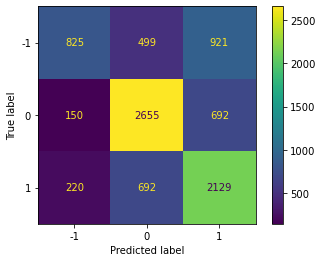

In [ ]:
plot_confusion_matrix(tree_grid.best_estimator_, X_test, y_test)

print(classification_report(tree_grid.best_estimator_.predict(X_test), y_test))

In [ ]:
dforest = RandomForestClassifier()

params = {
    'n_estimators': np.arange(100, 400, 100),
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

forest_grid = GridSearchCV(dforest, params, cv=5)

In [ ]:
forest_grid.fit(X_train, y_train)

forest_grid.best_params_

c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "c:\Users\agcwi\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

              precision    recall  f1-score   support

          -1       0.01      1.00      0.02        18
           0       0.99      0.43      0.60      7997
           1       0.18      0.73      0.29       768

    accuracy                           0.46      8783
   macro avg       0.39      0.72      0.30      8783
weighted avg       0.92      0.46      0.57      8783



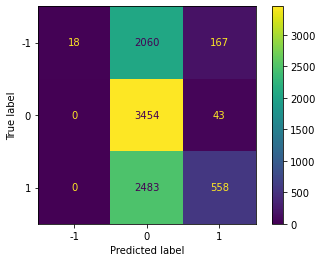

In [ ]:
plot_confusion_matrix(forest_grid.best_estimator_, X_test, y_test)

print(classification_report(forest_grid.best_estimator_.predict(X_test), y_test))